In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [16]:
def extract_counts_from_folder(root_folder):
    # Mapping of Tactic names to MITRE IDs
    tactic_name_to_id = {
        "Reconnaissance": "TA0043",
        "Resource Development": "TA0042",
        "Initial Access": "TA0001",
        "Execution": "TA0002",
        "Persistence": "TA0003",
        "Privilege Escalation": "TA0004",
        "Defense Evasion": "TA0005",
        "Credential Access": "TA0006",
        "Discovery": "TA0007",
        "Lateral Movement": "TA0008",
        "Collection": "TA0009",
        "Command and Control": "TA0011",
        "Exfiltration": "TA0010",
        "Impact": "TA0040"
    }

    counts = []
    for tactic in os.listdir(root_folder):
        tactic_path = os.path.join(root_folder, tactic)
        if not os.path.isdir(tactic_path):
            continue

        # Replace tactic name with ID if found
        tactic_id = tactic_name_to_id.get(tactic, tactic)  # fallback to original if not found

        for technique in os.listdir(tactic_path):
            technique_path = os.path.join(tactic_path, technique)
            if not os.path.isdir(technique_path):
                continue

            has_subtech = False
            for subtech in os.listdir(technique_path):
                subtech_path = os.path.join(technique_path, subtech)
                if os.path.isdir(subtech_path):
                    has_subtech = True
                    files = os.listdir(subtech_path)
                    counts.append({
                        'Tactic': tactic_id,
                        'Technique': technique,
                        'Sub-technique': subtech,
                        'Count': len(files)
                    })

            if not has_subtech:
                # Count files directly in the technique folder if no subtechnique exists
                counts.append({
                    'Tactic': tactic_id,
                    'Technique': technique,
                    'Sub-technique': None,
                    'Count': len(os.listdir(technique_path))
                })

    return pd.DataFrame(counts)


In [17]:
df1 = extract_counts_from_folder(r'C:\Users\AHMED\Desktop\new-approch\dataset\organized')
df2 = extract_counts_from_folder(r'C:\Users\AHMED\Desktop\new-approch\dataset\organized_datasets_atomic')



In [18]:
df1

,Tactic,Technique,Sub-technique,Count
0,TA0011,T1090,T1090,6
1,TA0011,T1105,T1105,2
2,TA0006,T1003,T1003,16
3,TA0006,T1003,T1003.001,2
4,TA0006,T1056,T1056,1
...,...,...,...,...
58,TA0004,T1053,T1053,2
59,TA0004,T1068,T1068,4
60,TA0004,T1134,T1134,13
61,TA0004,T1548,T1548.002,28


In [19]:
df2

,Tactic,Technique,Sub-technique,Count
0,TA0002,T1021,empire_psexec_dcerpc_tcp_svcctl,1
1,TA0002,T1021,T1021_003,1
2,TA0002,T1021,T1021_006,2
3,TA0002,T1047,covenant_sharpwmi_create_dcerpc_wmi,1
4,TA0002,T1047,covenant_wmi_remote_event_subscription_ActiveS...,1
...,...,...,...,...
87,TA0008,T1053,T1053_005,0
88,TA0008,T1210,mimikatz_CVE-2020-1472_Unauthenticated_NetrSer...,1
89,TA0008,T1550,T1550_002,0
90,TA0009,T1056,T1056_002,0


In [20]:
# Merge on Tactic, Technique, Sub-technique
df_merge = pd.merge(df1, df2, on=['Tactic','Technique','Sub-technique'], how='outer', suffixes=('_set1', '_set2')).fillna(0)
df_merge

,Tactic,Technique,Sub-technique,Count_set1,Count_set2
0,TA0011,T1090,T1090,6.0,0.0
1,TA0011,T1105,T1105,2.0,0.0
2,TA0006,T1003,T1003,16.0,0.0
3,TA0006,T1003,T1003.001,2.0,0.0
4,TA0006,T1056,T1056,1.0,0.0
...,...,...,...,...,...
150,TA0008,T1053,T1053_005,0.0,0.0
151,TA0008,T1210,mimikatz_CVE-2020-1472_Unauthenticated_NetrSer...,0.0,1.0
152,TA0008,T1550,T1550_002,0.0,0.0
153,TA0009,T1056,T1056_002,0.0,0.0


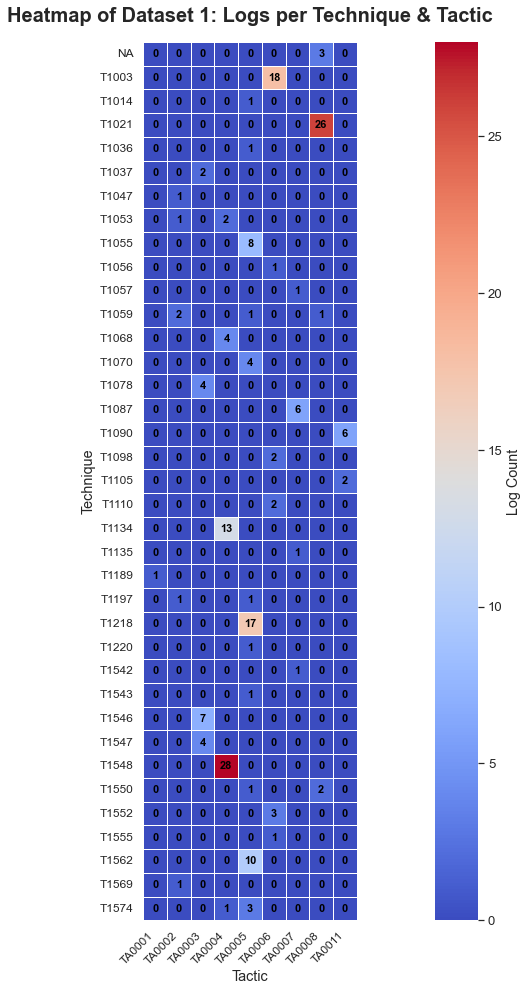

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Tactic and Technique (aggregate sub-techniques into parent)
df1_grouped = df1.groupby(['Tactic', 'Technique'], as_index=False)['Count'].sum()

# Pivot the grouped data
pivot1 = df1_grouped.pivot_table(index='Technique', columns='Tactic', values='Count', fill_value=0).astype(int)

# Plot setup
plt.figure(figsize=(22, 14))
sns.set(style="whitegrid", font_scale=1.2)

# Create the heatmap
ax = sns.heatmap(
    pivot1,
    annot=True,
    fmt='d',
    linewidths=0.8,
    linecolor='white',
    cmap='coolwarm',  # More colorful and contrast-rich
    cbar_kws={'label': 'Log Count'},
    annot_kws={'fontsize': 11, 'fontweight': 'bold', 'color': 'black'},
    square=True
)

# Add titles and formatting
plt.title("Heatmap of Dataset 1: Logs per Technique & Tactic", fontsize=20, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Optional: Dark mode toggle
# plt.style.use('dark_background')

plt.show()


C:\Users\AHMED\AppData\Local\Temp\ipykernel_26548\3812938402.py:32: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
c:\Users\AHMED\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


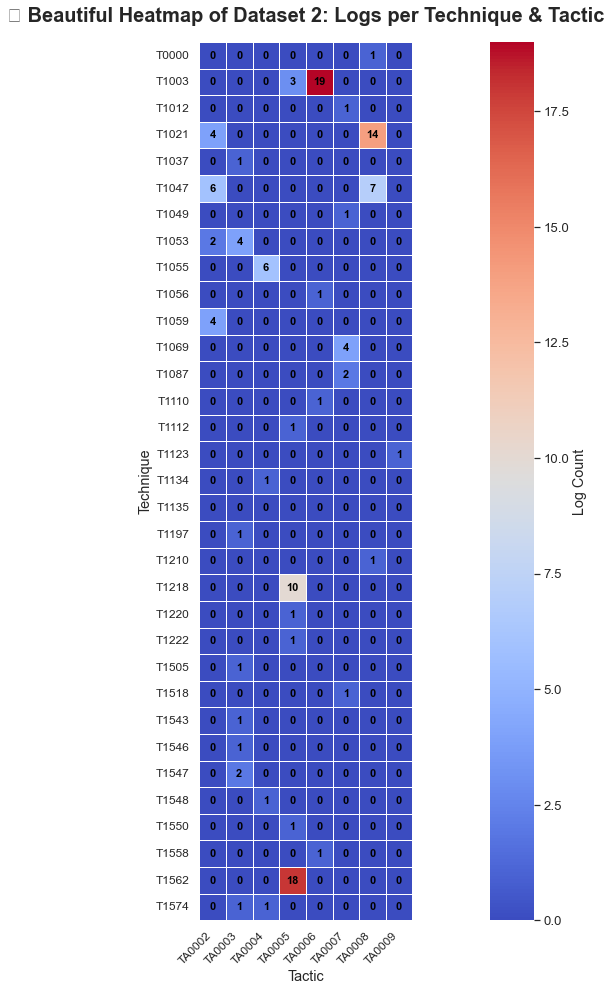

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Tactic and Technique (aggregate sub-techniques into parent)
df2_grouped = df2.groupby(['Tactic', 'Technique'], as_index=False)['Count'].sum()

# Pivot the grouped data
pivot2 = df2_grouped.pivot_table(index='Technique', columns='Tactic', values='Count', fill_value=0).astype(int)

# Plot setup
plt.figure(figsize=(22, 14))
sns.set(style="whitegrid", font_scale=1.2)

# Create the heatmap
ax = sns.heatmap(
    pivot2,
    annot=True,
    fmt='d',
    linewidths=0.8,
    linecolor='white',
    cmap='coolwarm',  # More colorful and contrast-rich
    cbar_kws={'label': 'Log Count'},
    annot_kws={'fontsize': 11, 'fontweight': 'bold', 'color': 'black'},
    square=True
)

# Add titles and formatting
plt.title("🎯 Beautiful Heatmap of Dataset 2: Logs per Technique & Tactic", fontsize=20, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Optional: Dark mode toggle
# plt.style.use('dark_background')

plt.show()


C:\Users\AHMED\AppData\Local\Temp\ipykernel_26548\1068070305.py:33: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
c:\Users\AHMED\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


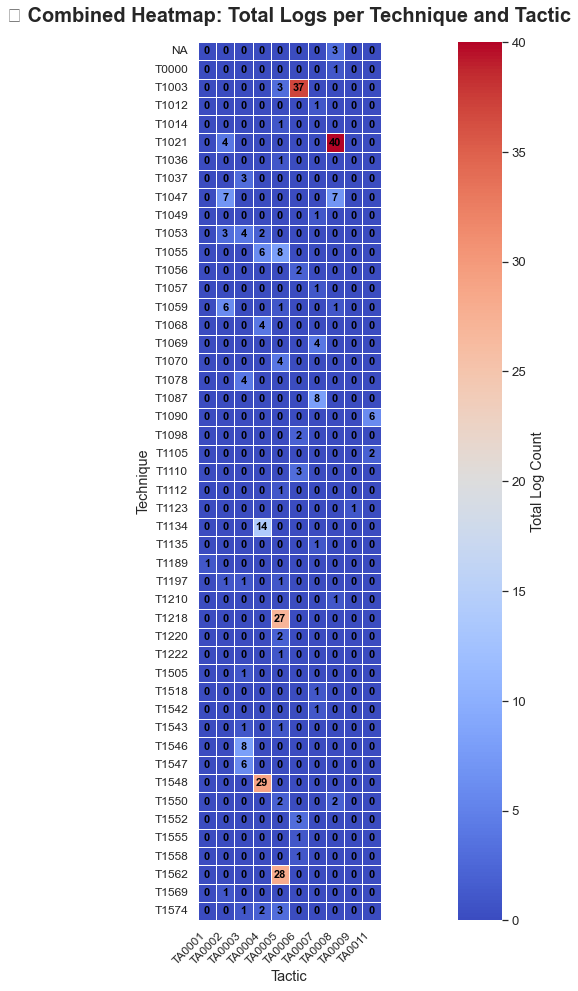

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Add a total count column
df_merge['Total_Count'] = df_merge['Count_set1'] + df_merge['Count_set2']

# Step 2: Group by Tactic and Technique (aggregate across sub-techniques)
df_grouped = df_merge.groupby(['Tactic', 'Technique'], as_index=False)['Total_Count'].sum()

# Step 3: Pivot for heatmap
pivot_total = df_grouped.pivot_table(index='Technique', columns='Tactic', values='Total_Count', fill_value=0).astype(int)

# Step 4: Plot the beautiful heatmap
plt.figure(figsize=(22, 14))
sns.set(style="whitegrid", font_scale=1.2)

ax = sns.heatmap(
    pivot_total,
    annot=True,
    fmt='d',
    linewidths=0.8,
    linecolor='white',
    cmap='coolwarm',
    cbar_kws={'label': 'Total Log Count'},
    annot_kws={'fontsize': 11, 'fontweight': 'bold', 'color': 'black'},
    square=True
)

plt.title("🔥 Combined Heatmap: Total Logs per Technique and Tactic", fontsize=20, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\AHMED\AppData\Local\Temp\ipykernel_26548\942313146.py:7: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from current font.
  plt.tight_layout()
c:\Users\AHMED\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


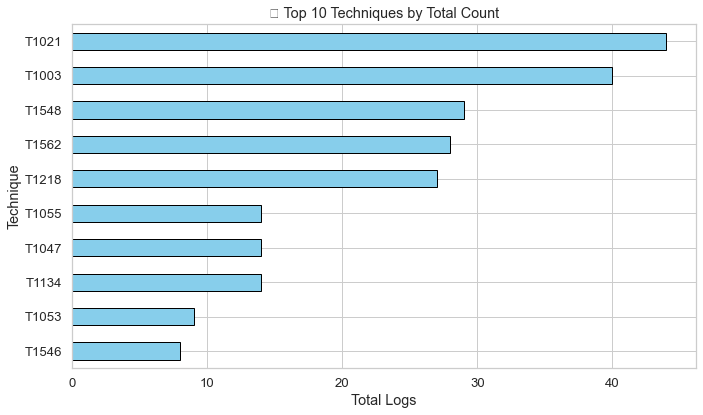

In [32]:
top_techniques = df_merge.groupby('Technique')['Total_Count'].sum().sort_values(ascending=False).head(10)
top_techniques.plot(kind='barh', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.xlabel("Total Logs")
plt.title("🔝 Top 10 Techniques by Total Count")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\AHMED\AppData\Local\Temp\ipykernel_26548\2780736577.py:5: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
c:\Users\AHMED\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


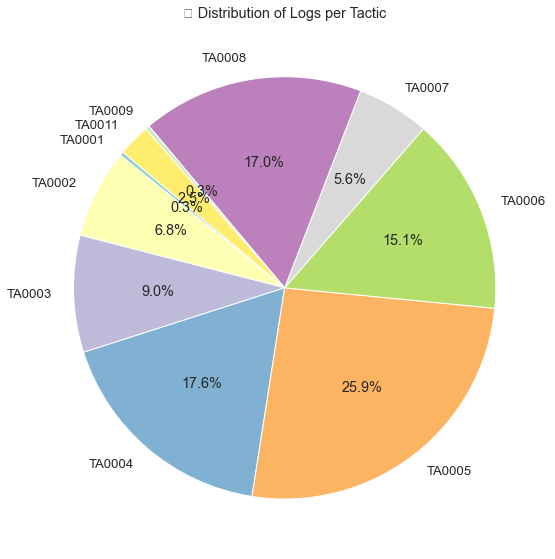

In [33]:
tactic_distribution = df_merge.groupby('Tactic')['Total_Count'].sum()
tactic_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8), colormap='Set3')
plt.ylabel('')
plt.title("🎯 Distribution of Logs per Tactic")
plt.tight_layout()
plt.show()


C:\Users\AHMED\AppData\Local\Temp\ipykernel_26548\2975765180.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\AHMED\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


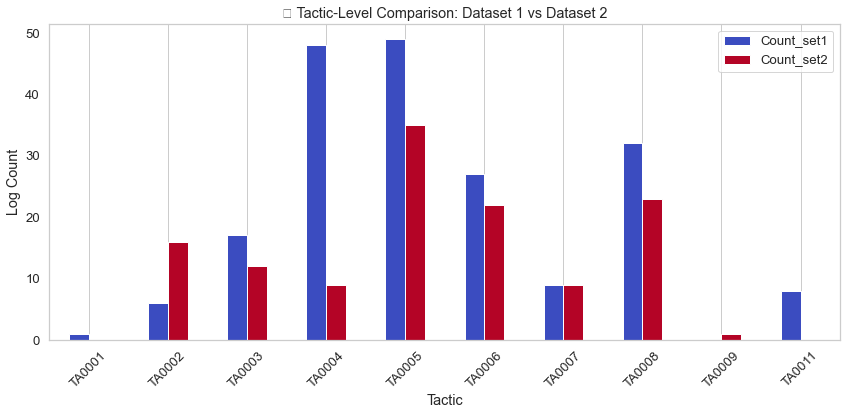

In [35]:
comparison = df_merge.groupby('Tactic')[['Count_set1', 'Count_set2']].sum()
comparison.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title("📊 Tactic-Level Comparison: Dataset 1 vs Dataset 2")
plt.ylabel("Log Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\AHMED\AppData\Local\Temp\ipykernel_26548\503942825.py:6: UserWarning: Glyph 127807 (\N{HERB}) missing from current font.
  plt.tight_layout()
c:\Users\AHMED\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


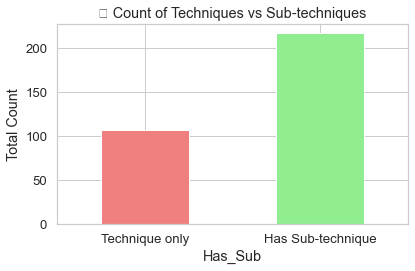

In [37]:
df_merge['Has_Sub'] = df_merge['Sub-technique'] != df_merge['Technique']
df_merge.groupby('Has_Sub')['Total_Count'].sum().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.xticks([0,1], ['Technique only', 'Has Sub-technique'], rotation=0)
plt.title("🌿 Count of Techniques vs Sub-techniques")
plt.ylabel("Total Count")
plt.tight_layout()
plt.show()


In [41]:
unique_techniques = len(df_grouped)
print(f"✅ Total unique techniques covered in both datasets: {unique_techniques}")


✅ Total unique techniques covered in both datasets: 70


In [42]:
unique_techniques=len(df1_grouped)
unique_techniques2=len(df2_grouped)
print(f"✅ Total unique techniques in Dataset 1: {unique_techniques}")
print(f"✅ Total unique techniques in Dataset 2: {unique_techniques2}")

✅ Total unique techniques in Dataset 1: 44
✅ Total unique techniques in Dataset 2: 50
